In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator

In [6]:
## try lager bottle neck

# 1. load data

df = pd.read_csv('./LID_results/data_ID_results_moredata.csv')
df = df.dropna()
# sort by DM method
df = df.sort_values(by=['DM method'])
df

,Dataset,DM method,Dim,n_sample,n_cluster,Intrinsic Dim (reconstructed),Intrinsic Dim (data),bottleneck_dim
30,blobs_dim3_n5000_y10,DBM_02,3,5000,10,2.3,3.0,2.0
31,blobs_dim10_n5000_y10,DBM_02,10,5000,10,2.2,10.0,2.0
32,blobs_dim30_n5000_y10,DBM_02,30,5000,10,2.1,28.0,2.0
33,blobs_dim100_n5000_y10,DBM_02,100,5000,10,2.0,87.4,2.0
49,blobs_dim3_n5000_y10,DBM_03,3,5000,10,3.0,3.0,3.0
50,blobs_dim10_n5000_y10,DBM_03,10,5000,10,5.0,10.0,3.0
51,blobs_dim30_n5000_y10,DBM_03,30,5000,10,3.0,28.0,3.0
52,blobs_dim100_n5000_y10,DBM_03,100,5000,10,2.5,87.4,3.0
12,blobs_dim10_n5000_y10,DBM_10,10,5000,10,8.7,10.0,10.0
13,blobs_dim30_n5000_y10,DBM_10,30,5000,10,17.8,28.0,10.0


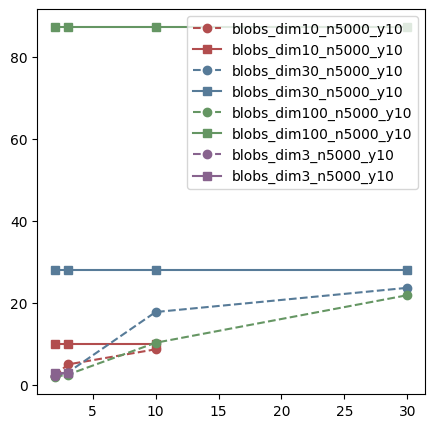

In [3]:
fig, ax = plt.subplots(figsize=(5, 5))
colors = sns.color_palette("Set1", n_colors=8, desat=.5)
for i, dataset in enumerate(df['Dataset'].unique()):
    curdf = df[df['Dataset'] == dataset]
    # sort by bottleneck dim
    curdf = curdf.sort_values(by=['bottleneck_dim'])
    ax.plot(curdf['bottleneck_dim'], curdf['Intrinsic Dim (reconstructed)'], '--o', label=dataset, color=colors[i])
    ax.plot(curdf['bottleneck_dim'], curdf['Intrinsic Dim (data)'], '-s', label=dataset, color=colors[i])
ax.legend()

In [56]:
df = pd.read_csv('./LID_results_new_grid500/data_ID_bigneck.csv')
# df = df.dropna()
# sort by DM method
# df = df.sort_values(by=['DM method'])
df

,Dataset,DM method,Dim,n_sample,n_cluster,Intrinsic Dim (reconstructed),Intrinsic Dim (data),Esimated ID (reco),Esimated ID (data),bottleneck_dim
0,blobs_dim30_n5000_y10,DBM_2,30,5000,10,NaN,NaN,2.0048,25.8672,2.0
1,blobs_dim30_n5000_y10,DBM_5,30,5000,10,NaN,NaN,4.5966,25.8672,5.0
2,blobs_dim30_n5000_y10,DBM_10,30,5000,10,NaN,NaN,10.5200,25.8672,10.0
3,blobs_dim30_n5000_y10,DBM_15,30,5000,10,NaN,NaN,18.7206,25.8672,15.0
4,blobs_dim30_n5000_y10,DBM_20,30,5000,10,NaN,NaN,19.9232,25.8672,20.0
5,blobs_dim60_n5000_y10,DBM_2,60,5000,10,NaN,NaN,2.0000,44.6232,2.0
6,blobs_dim60_n5000_y10,DBM_5,60,5000,10,NaN,NaN,4.5946,44.6232,5.0
7,blobs_dim60_n5000_y10,DBM_10,60,5000,10,NaN,NaN,9.0886,44.6232,10.0
8,blobs_dim60_n5000_y10,DBM_15,60,5000,10,NaN,NaN,24.9336,44.6232,15.0
9,blobs_dim60_n5000_y10,DBM_20,60,5000,10,NaN,NaN,17.3150,44.6232,20.0


[25.8672 25.8672 25.8672 25.8672 25.8672]
[44.6232 44.6232 44.6232 44.6232 44.6232]
[57.5464 57.5464 57.5464 57.5464 57.5464]
[49.589 49.589 49.589 49.589 49.589]


/tmp/ipykernel_895213/4004680353.py:9: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax2.get_shared_y_axes().join(ax2, ax1)


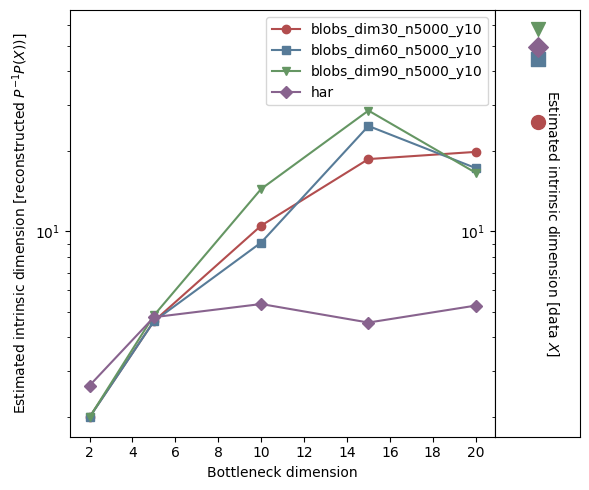

In [80]:
fig = plt.figure(figsize=(6, 5))
gs0 = gridspec.GridSpec(1, 1, figure=fig)

gs00 = gridspec.GridSpecFromSubplotSpec(1, 6, subplot_spec=gs0[0])

ax1 = fig.add_subplot(gs00[0, :-1])
ax2 = fig.add_subplot(gs00[0, -1])
# link the y-axis of ax2 to ax1
ax2.get_shared_y_axes().join(ax2, ax1)
# ax2.set_yticks([])

colors = sns.color_palette("Set1", n_colors=8, desat=.5)
markers = ['o', 's', 'v', 'D', 'P', 'X', 'd', 'h']
for i, dataset in enumerate(df['Dataset'].unique()):
    curdf = df[df['Dataset'] == dataset]
    # sort by bottleneck dim
    curdf = curdf.sort_values(by=['bottleneck_dim'])
    ax1.plot(curdf['bottleneck_dim'], curdf['Esimated ID (reco)'], '-'+markers[i], label=dataset, color=colors[i])
    # ax.plot(curdf['bottleneck_dim'], curdf['Intrinsic Dim (data)'], '-s', label=dataset, color=colors[i])
    print(curdf['Esimated ID (data)'].values)
    ax2.scatter([0], [curdf['Esimated ID (data)'].values[0]], marker=markers[i], label=dataset, color=colors[i], s=100)

# make ax1 occupy 80% of the figure, ax2 occupy 20%
ax2.set_xticks([])
# ytciks to the right

ax1.set_xlabel('Bottleneck dimension')
ax1.set_ylabel('Estimated intrinsic dimension [reconstructed $P^{-1}P(X))$]')
# ax2.yaxis.tick_right()
ax2.set_yticklabels([])
# ax2.yaxis.tick_right()
# set ax2 yaxis label at the right side
ax2.set_ylabel('Estimated intrinsic dimension [data $X$]', rotation=-90, labelpad=-60)

# set withe space between subplots
plt.subplots_adjust(wspace=0.0)

# ax1 tikcs intager
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
# log scale
ax1.set_yscale('log')
plt.tight_layout()
ax1.legend()


NameError: name 'ax' is not defined

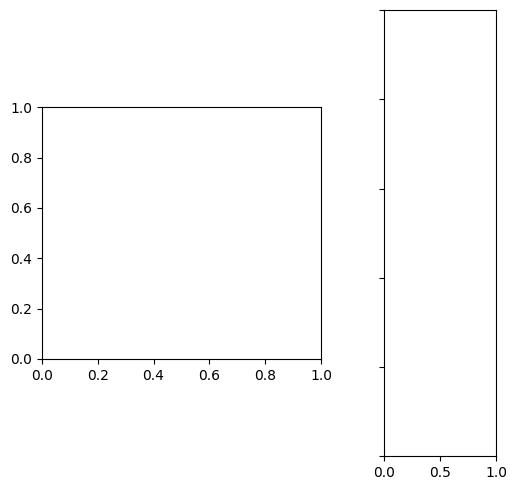

In [47]:
fig, (ax1, ax2) = plt.subplots(figsize=(6, 5), sharey=True, ncols=2)
colors = sns.color_palette("Set1", n_colors=8, desat=.5)
markers = ['o', 's', 'v', 'D', 'P', 'X', 'd', 'h']
for i, dataset in enumerate(df['Dataset'].unique()):
    curdf = df[df['Dataset'] == dataset]
    # sort by bottleneck dim
    # curdf = curdf.sort_values(by=['bottleneck_dim'])
    # ax1.plot(curdf['bottleneck_dim'], curdf['Esimated ID (reco'], '-'+markers[i], label=dataset, color=colors[i])
    # # ax.plot(curdf['bottleneck_dim'], curdf['Intrinsic Dim (data)'], '-s', label=dataset, color=colors[i])
    # ax2.plot([0], curdf['Esimated ID (data)'][0], markers[i], label=dataset, color=colors[i])

# make ax1 occupy 80% of the figure, ax2 occupy 20%
ax1.set_aspect(0.9)
ax2.set_aspect(4)

plt.tight_layout()
ax.legend()